<a href="https://colab.research.google.com/github/Rafe2001/Spam-Mail-Classifier/blob/main/Spam_Email_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.shape

(5572, 2)

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.duplicated().sum()

415

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(5157, 2)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# EDA

In [11]:
df['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

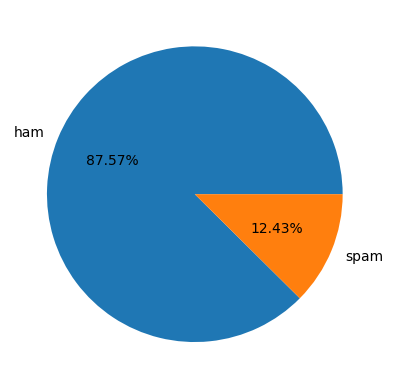

In [12]:
plt.pie(df['Category'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f%%')
plt.show()

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
df['num_characters']=df['Message'].apply(len)

In [15]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [18]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.describe()

,Category,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [20]:
 #ham
df[df['Category']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
#spam
df[df['Category']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

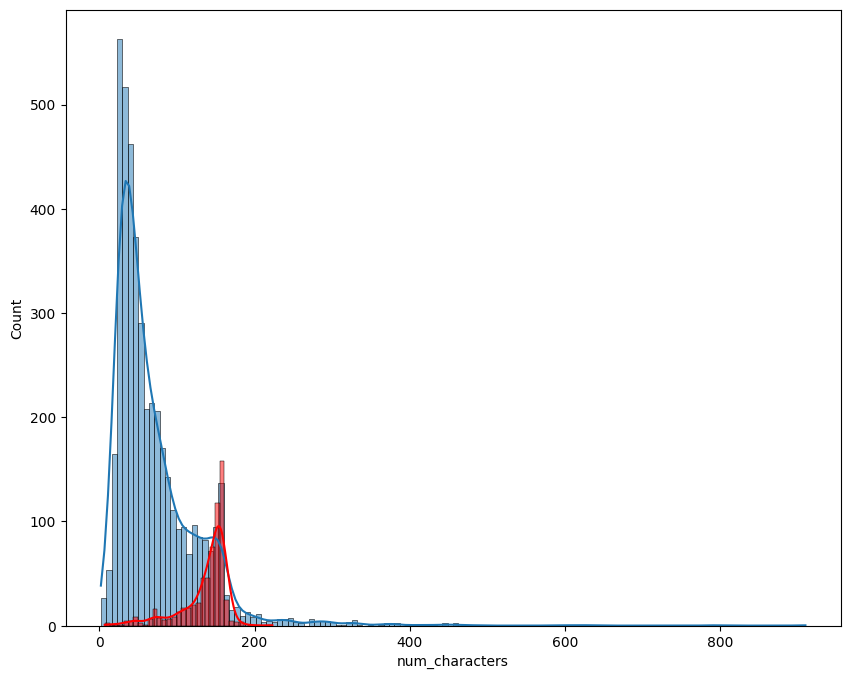

In [22]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['Category']==0]['num_characters'],kde=True)
sns.histplot(df[df['Category']==1]['num_characters'],color='red',kde=True)

<Axes: xlabel='num_words', ylabel='Count'>

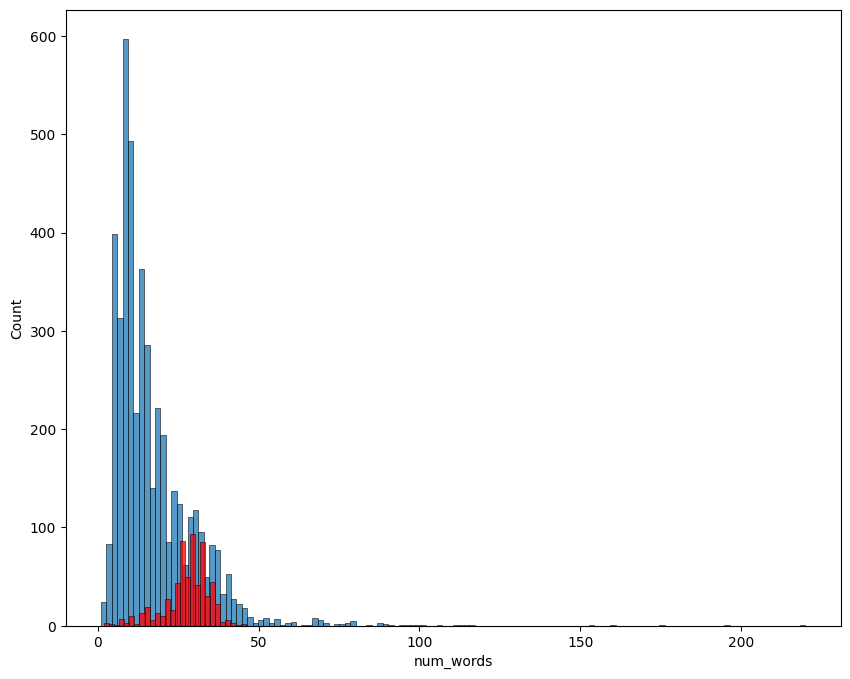

In [23]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['Category']==0]['num_words'])
sns.histplot(df[df['Category']==1]['num_words'],color='red')

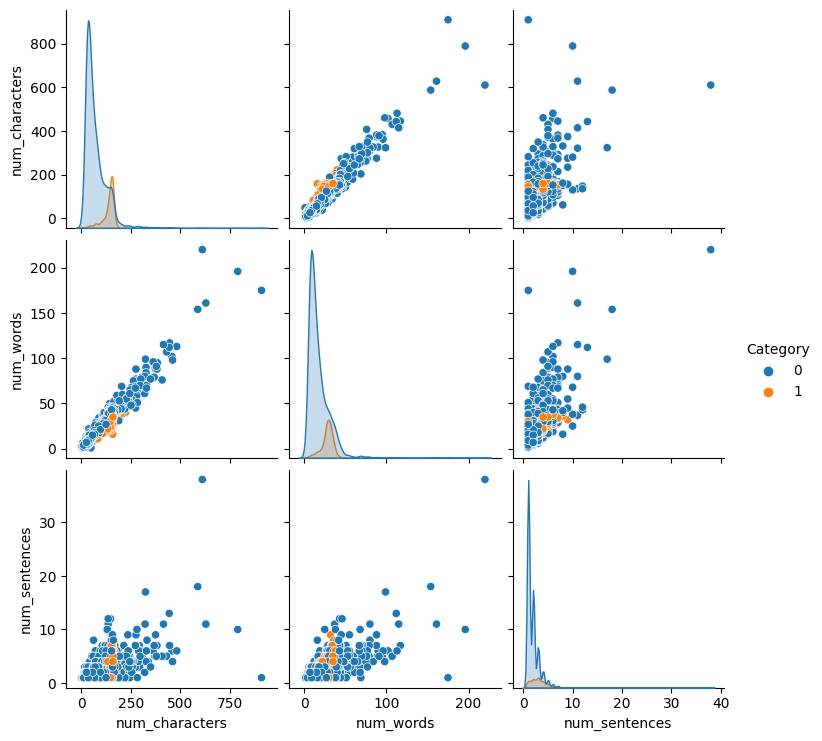

In [24]:
sns.pairplot(df,hue='Category')

<ipython-input-25-838683213b75>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})


<Axes: >

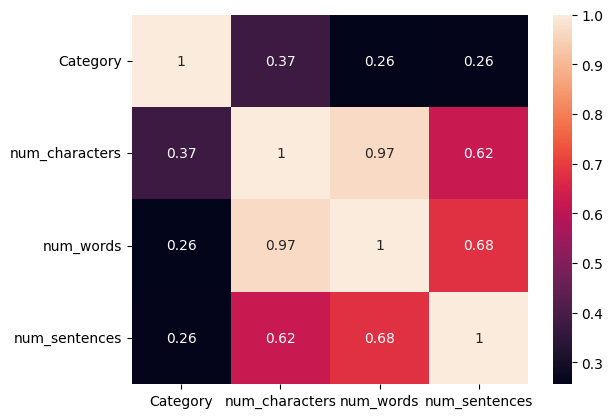

In [25]:
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})

# Data Preprocessing

* Lower case 
* Tokenization
* Removing Special characters
* Removing Stop words and punctuation
* Stemming





In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
      
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
       y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [28]:
transform_text("Hi, im a boy which love machine learning and riding")

'hi im boy love machin learn ride'

In [29]:
df['Transform_message'] = df['Message'].apply(transform_text)

In [30]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,Transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [31]:
from wordcloud import WordCloud
wc = WordCloud(height = 500, width =500,min_font_size = 10,background_color='white')

In [32]:
spam_wc = wc.generate(df[df['Category']==1]['Transform_message'].str.cat(sep=" "))

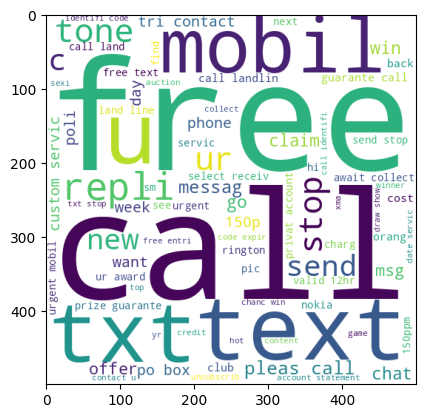

In [33]:
plt.imshow(spam_wc)

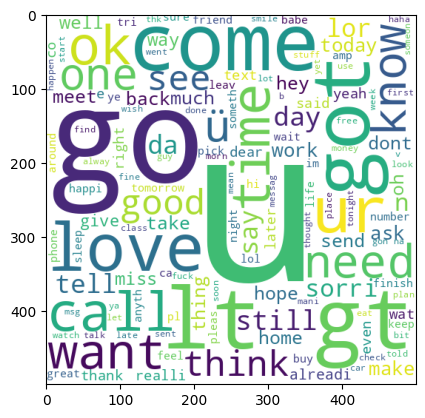

In [34]:
ham_wc = wc.generate(df[df['Category']==0]['Transform_message'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [35]:
from collections import Counter

In [36]:
spam_wds = []
for wds in df[df['Category']==1]['Transform_message'].tolist():
  for words1 in wds.split():
    spam_wds.append(words1)

In [37]:
len(spam_wds)

9781

In [38]:
ham_wds = []
for wds2 in df[df['Category']==0]['Transform_message'].tolist():
  for words2 in wds2.split():
    ham_wds.append(words2)

In [39]:
len(ham_wds)

35940

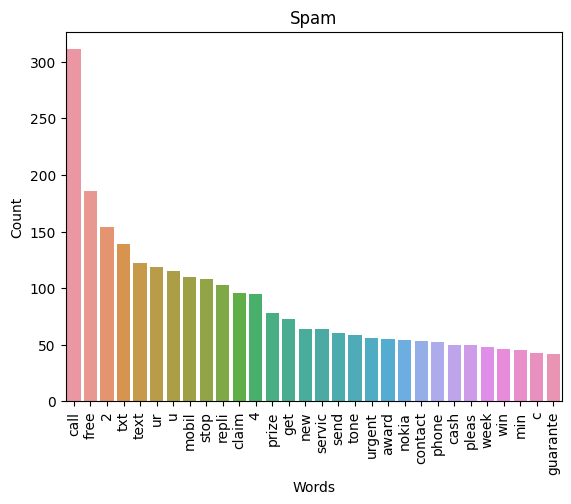

In [40]:
counter = Counter(spam_wds)
most_common = counter.most_common(30)
spam_words = pd.DataFrame(most_common, columns=["Words", "Count"])
sns.barplot(x="Words", y="Count", data=spam_words)
plt.xticks(rotation='vertical')
plt.title("Spam")
plt.show()

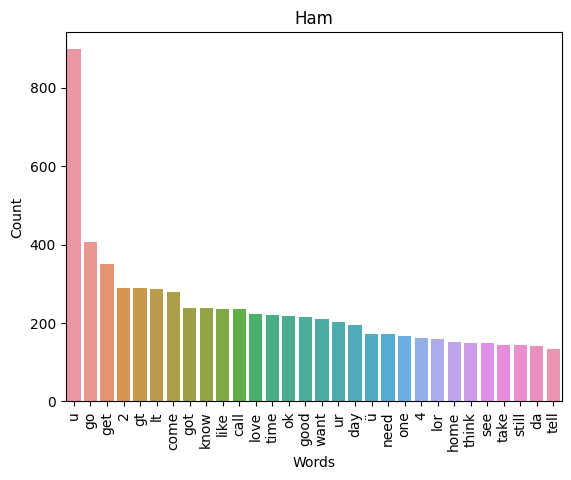

In [41]:
counter2 = Counter(ham_wds)
most_common2 = counter2.most_common(30)
ham_words = pd.DataFrame(most_common2, columns=["Words", "Count"])
sns.barplot(x="Words", y="Count", data=ham_words)
plt.xticks(rotation='vertical')
plt.title("Ham")
plt.show()

In [42]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,Transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [44]:
X = tfidf.fit_transform(df['Transform_message']).toarray()

In [45]:
y = df['Category'].values

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
print(X_train.shape,y_train.shape)

(4125, 3000) (4125,)


In [48]:
oversampler = SMOTE()
undersampler = RandomUnderSampler()

X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train_resampled,y_train_resampled)
mnb.fit(X_train_resampled,y_train_resampled)
bnb.fit(X_train_resampled,y_train_resampled)

BernoulliNB()

In [51]:
y_pred1 = gnb.predict(X_test)
y_pred2 = mnb.predict(X_test)
y_pred3 = bnb.predict(X_test)

print("Accuracy of gnb is:", accuracy_score(y_pred1,y_test))
print("Accuracy of mnb is:", accuracy_score(y_pred2,y_test))
print("Accuracy of bnb is:", accuracy_score(y_pred3,y_test))

Accuracy of gnb is: 0.8837209302325582
Accuracy of mnb is: 0.9602713178294574
Accuracy of bnb is: 0.9874031007751938


In [52]:
print("Precision score is:",precision_score(y_pred1,y_test))
print("Precision score is:",precision_score(y_pred2,y_test))
print("Precision score is:",precision_score(y_pred3,y_test))

Precision score is: 0.8897058823529411
Precision score is: 0.9558823529411765
Precision score is: 0.9117647058823529


In [53]:
print("mnb:\n",confusion_matrix(y_pred2,y_test))

mnb:
 [[861   6]
 [ 35 130]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       867
           1       0.96      0.79      0.86       165

    accuracy                           0.96      1032
   macro avg       0.96      0.89      0.92      1032
weighted avg       0.96      0.96      0.96      1032



In [55]:
rfc = RandomForestClassifier(n_estimators = 100, random_state=42)
svc = SVC(kernel='rbf',gamma=1.0)
reg = LogisticRegression(solver='liblinear', penalty = 'l1')

In [56]:
rfc.fit(X_train_resampled,y_train_resampled)
svc.fit(X_train_resampled,y_train_resampled)
reg.fit(X_train_resampled,y_train_resampled)

y_pred_rfc = rfc.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_reg = reg.predict(X_test)

In [57]:
print("The Accuracy of rfc is:",accuracy_score(y_pred_rfc,y_test))
print("The Accuracy of svc is:",accuracy_score(y_pred_svc,y_test))
print("The Accuracy of reg is:",accuracy_score(y_pred_reg,y_test))

print("Precision score is:",precision_score(y_pred_rfc,y_test))
print("Precision score is:",precision_score(y_pred_svc,y_test))
print("Precision score is:",precision_score(y_pred_reg,y_test))

The Accuracy of rfc is: 0.9835271317829457
The Accuracy of svc is: 0.9728682170542635
The Accuracy of reg is: 0.9612403100775194
Precision score is: 0.9117647058823529
Precision score is: 0.8602941176470589
Precision score is: 0.9264705882352942


In [67]:
new_email = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
new_email_vector = tfidf.transform([new_email])
prediction = mnb.predict(new_email_vector)

if prediction[0]== 'spam':
  recommendation = 'This email is classified as spam'
else:
  recommendation = "This email is not classified as spam"

print(recommendation)

This email is not classified as spam


In [66]:
new_email = "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."
new_email_vector = tfidf.transform([new_email])
prediction = mnb.predict(new_email_vector)

if prediction[0]== 'spam':
  recommendation = 'This email is classified as spam'
else:
  recommendation = "This email is not classified as spam"

print(recommendation)

This email is not classified as spam


In [65]:
new_email = "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv"
new_email_vector = tfidf.transform([new_email])
prediction = mnb.predict(new_email_vector)

if prediction[0]== 'spam':
  recommendation = 'This email is classified as spam'
else:
  recommendation = "This email is not classified as spam"

print(recommendation)

This email is not classified as spam
